In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\data science class\\assignments\\Logistic Regression\\Titanic_train.csv")
df
#already data is seperated so no need to data partition

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
#specify the target and feature
Y_train = df['Survived']
X_train= df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Fare',  'Embarked']]  #as per target variable i consider these x variable which realted to survive
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [41]:
#Data Cleaning
df.info()
df.isnull().sum()  # we see Age and Embarked variable contain Null value i am replacing with median

df.describe()

df['Age'].fillna(df['Age'].median(), inplace=True) # fill missing value of age with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # fill missing value of age with mode

df.isnull().sum()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9260\1887997670.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) # fill missing value of age with median
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9260\1887997670.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

(891, 12)

In [42]:
#specify the target and feature
Y_train = df['Survived']
X_train= df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Fare',  'Embarked']]  #as per target variable i consider these x variable which realted to survive
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


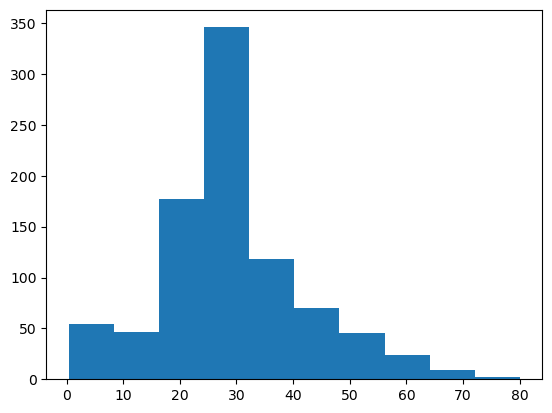

<Axes: xlabel='SibSp'>

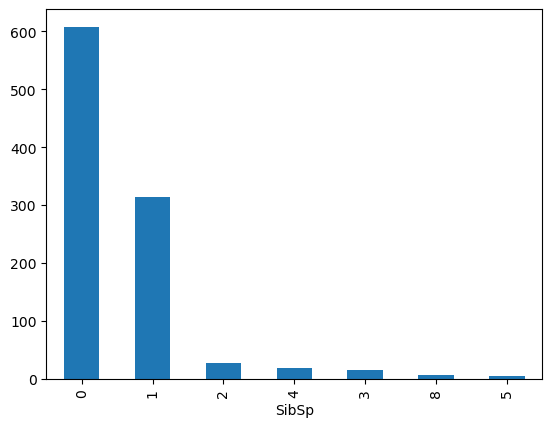

In [43]:
#EDA -  Histogram, bar graph
import matplotlib.pyplot as plt
plt.hist(df['Age'])
plt.show()
t=df['Sex'].value_counts()
t.plot(kind="bar")
t1=df['SibSp'].value_counts()
t1.plot(kind='bar')

In [44]:
#data transformation
#target variables is already transformed
from sklearn.preprocessing import StandardScaler, LabelEncoder
SS = StandardScaler()
LE = LabelEncoder()

SS_X = SS.fit_transform(X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
SS_X= pd.DataFrame(SS_X)
SS_X.columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
SS_X

LE_X_sex= LE.fit_transform(X_train[['Sex']])
LE_X_sex = pd.DataFrame(LE_X_sex)
LE_X_sex.columns=['Sex']
LE_X_sex
LE_X_Embarked= LE.fit_transform(X_train[['Embarked']])
LE_X_Embarked = pd.DataFrame(LE_X_Embarked)
LE_X_Embarked.columns=['Embarked']
LE_X_Embarked
X_train = pd.concat([SS_X, LE_X_sex,LE_X_Embarked], axis=1)
X_train

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1,2
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0,0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0,2
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0,2
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1,2
...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1,2
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0,2
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0,2
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1,0


In [45]:
#model fitting  - our targhet variable is descret so using logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42)

#fit the model
model.fit(X_train,Y_train)

#predictions
y_pred_train = model.predict(X_train)
y_pred_train


from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_train, y_pred_train)
precision = precision_score(Y_train, y_pred_train)
recall = recall_score(Y_train, y_pred_train)
f1 = f1_score(Y_train, y_pred_train)
print("accuracy is:", np.round(accuracy,2))
print("Precision: ", np.round(precision,4))
print("Recall: ",np.round(recall,4))
print("F1-Score: ", np.round(f1, 4))

accuracy is: 0.8
Precision:  0.7611
Recall:  0.6988
F1-Score:  0.7287


In [46]:
''' 
from abve Precision is 0.7611 means no False Positive,  model is predicting survived as survived 
from abve Recall is 0.6988 means no False Negative,  model is predicting survived as survived 
'''

' \nfrom abve Precision is 0.7611 means no False Positive,  model is predicting survived as survived \nfrom abve Recall is 0.6988 means no False Negative,  model is predicting survived as survived \n'

In [26]:
df_test = pd.read_csv("C:\\data science class\\assignments\\Logistic Regression\\Titanic_test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

#Y_test = df_test[['Survived']]
X_test= df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Fare',  'Embarked']]  #as per target variable i consider these x variable which realted to survive
X_test
#data transformation
#target variables is already transformed
from sklearn.preprocessing import StandardScaler, LabelEncoder
SS = StandardScaler()
LE = LabelEncoder()

SS_X = SS.fit_transform(X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
SS_X= pd.DataFrame(SS_X)
SS_X.columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
SS_X

LE_X_sex= LE.fit_transform(X_test[['Sex']])
LE_X_sex = pd.DataFrame(LE_X_sex)
LE_X_sex.columns=['Sex']
LE_X_sex
LE_X_Embarked= LE.fit_transform(X_test[['Embarked']])
LE_X_Embarked = pd.DataFrame(LE_X_Embarked)
LE_X_Embarked.columns=['Embarked']
LE_X_Embarked
X_test = pd.concat([SS_X, LE_X_sex,LE_X_Embarked], axis=1)
X_test

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9260\4033463447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9260\4033463447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,1,1
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,0,2
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,1,1
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,1,2
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,0,2
...,...,...,...,...,...,...,...
413,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,1,2
414,-1.505120,0.740881,-0.499470,-0.400248,1.314435,0,0
415,0.873482,0.701476,-0.499470,-0.400248,-0.507796,1,2
416,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,1,2


In [29]:
#model fitting  - our targhet variable is descret so using logistic regression
#predictions
y_pred_test = model.predict(X_test)
y_pred_test= pd.DataFrame(y_pred_test)
print(y_pred_test)
y_pred_test.value_counts()

     0
0    0
1    0
2    0
3    0
4    1
..  ..
413  0
414  1
415  0
416  0
417  0

[418 rows x 1 columns]


0
0    268
1    150
Name: count, dtype: int64

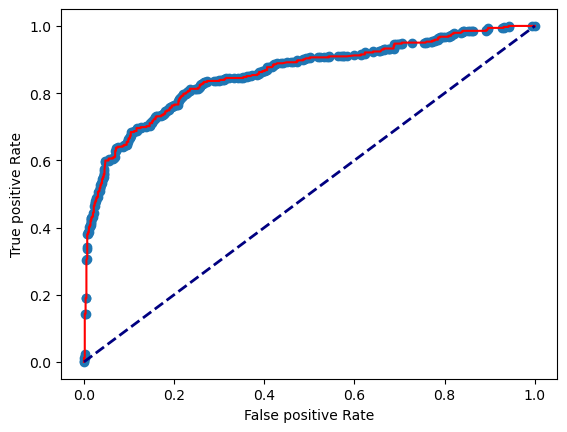

Area under curve: 85.704


In [33]:
#ROC curve
Y_pred = model.predict(X_train) # bo + b1x1

df["Predicted_proba"]   = model.predict_proba(X_train)[:,1:]
df.head()
df["Predicted_proba"]

#========================================================
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,dummy  = roc_curve(Y_train,df["Predicted_proba"])

import matplotlib.pyplot as plt
plt.scatter(x = fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc = roc_auc_score(Y_train,df["Predicted_proba"])
print("Area under curve:", (auc*100).round(3))

In [38]:
coefficients = model.coef_[0]
feature_names = X_test.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

    Feature  Coefficient
0    Pclass    -0.881262
1       Age    -0.490674
2     SibSp    -0.346051
3     Parch    -0.068076
4      Fare     0.102783
5       Sex    -2.630839
6  Embarked    -0.213693


In [ ]:
''' 
so, we can say the feature which have larger coefficients has stronger impact on survival rate
'''

In [51]:
''' Interview Question
 1. What is the difference between precision and recall?

Precision and Recall are two important metrics used to evaluate the performance of classification models.

Precision: "all the instances predicted as positive, 
how many were actually positive?" It is calculated as:
   `Precision = True Positives / (True Positives + False Positives)`
   A high precision means that when the model predicts an instance belongs to the positive class, it is very likely correct. 

Recall (Sensitivity):"all the actual positive instances, 
how many did the model correctly identify?"
  `Recall = True Positives / (True Positives + False Negatives)`
  A high recall means that the model is good at finding all the positive instances

2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to test how well your machine learning model will perform on new, unseen data.
**k-fold cross-validation (where k=5).
-Split your data into “k” parts (e.g., 5 parts).
-Use 4 parts to train your model and 1 part to test it.
-Repeat this process 5 times, each time using a different part for testing.
-Average the results — this gives a more reliable estimate of how your model performs.

Binary classification means your model predicts one of two outcomes (e.g. spam or not spam, cancer or no cancer).
Cross-validation is important here because:
-Prevents Overfitting: Helps ensure your model doesn’t just memorize the training data.
-Gives a Fair Performance Estimate: You see how the model performs on multiple test sets, not just one.
-Works Well with Small Data: When you don’t have much data, you can use all of it for both training and testing — just at different times.
-Helps You Choose the Best Model: You can compare models or settings more fairly.

Cross-validation = A smart way to test your model multiple times on different data to make sure it truly works.
It makes your binary classification model more trustworthy and less likely to fail on real-world data.
'''

' Interview Question\n 1. What is the difference between precision and recall?\n\nPrecision and Recall are two important metrics used to evaluate the performance of classification models.\n\nPrecision: "all the instances predicted as positive, \nhow many were actually positive?" It is calculated as:\n   `Precision = True Positives / (True Positives + False Positives)`\n   A high precision means that when the model predicts an instance belongs to the positive class, it is very likely correct. \n\nRecall (Sensitivity):"all the actual positive instances, \nhow many did the model correctly identify?"\n  `Recall = True Positives / (True Positives + False Negatives)`\n  A high recall means that the model is good at finding all the positive instances\n\n2. What is cross-validation, and why is it important in binary classification?\nCross-validation is a technique used to test how well your machine learning model will perform on new, unseen data.\n**k-fold cross-validation (where k=5).\n-Split